In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head(10)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
5,13,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87975.750000,0
6,14,2,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94956.660000,0
7,18,2,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,251638.950000,0
8,20,2,45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101962.020000,0
9,23,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,356463.060000,0


In [54]:
df.shape

(76020, 371)

In [55]:
#Checking missing values
print(df.isnull().sum())

ID                         0
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
                          ..
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
TARGET                     0
Length: 371, dtype: int64


In [56]:
#Checking which columns have missing data
dfm=df.isnull().sum()
dfm=dfm[dfm>0]
dfm

Series([], dtype: int64)

In [57]:
negative_cols = (df<0).any()
print(negative_cols[negative_cols == True])

var3                            True
saldo_var1                      True
saldo_var5                      True
saldo_var8                      True
saldo_var30                     True
saldo_var40                     True
saldo_var42                     True
delta_imp_aport_var13_1y3       True
delta_imp_aport_var17_1y3       True
delta_imp_aport_var33_1y3       True
delta_imp_compra_var44_1y3      True
delta_imp_reemb_var17_1y3       True
delta_imp_trasp_var17_in_1y3    True
delta_imp_trasp_var33_in_1y3    True
delta_imp_venta_var44_1y3       True
delta_num_aport_var13_1y3       True
delta_num_aport_var17_1y3       True
delta_num_aport_var33_1y3       True
delta_num_compra_var44_1y3      True
delta_num_reemb_var17_1y3       True
delta_num_trasp_var17_in_1y3    True
delta_num_trasp_var33_in_1y3    True
delta_num_venta_var44_1y3       True
saldo_medio_var5_hace2          True
saldo_medio_var5_hace3          True
saldo_medio_var5_ult1           True
saldo_medio_var5_ult3           True
s

In [58]:
#Where there are negative values
print(df['var3'].value_counts())

var3
 2         74165
 8           138
-999999      116
 9           110
 3           108
           ...  
 40            1
 57            1
 112           1
 71            1
 213           1
Name: count, Length: 208, dtype: int64


In [38]:
#checking which columns contain -999999
df9=(df==-999999).sum()
print(df9[df9>0])

df9_columns=(df==-999999).any()
print(df9_columns[df9_columns==True])


# column var3 contains 116 missing values (-999999)


var3    116
dtype: int64
var3    True
dtype: bool


In [39]:
df.describe

<bound method NDFrame.describe of            ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
0           1     2     23                 0.0                      0.0   
1           3     2     34                 0.0                      0.0   
2           4     2     23                 0.0                      0.0   
3           8     2     37                 0.0                    195.0   
4          10     2     39                 0.0                      0.0   
...       ...   ...    ...                 ...                      ...   
76015  151829     2     48                 0.0                      0.0   
76016  151830     2     39                 0.0                      0.0   
76017  151835     2     23                 0.0                      0.0   
76018  151836     2     25                 0.0                      0.0   
76019  151838     2     46                 0.0                      0.0   

       imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  \
0     

In [40]:
#Checking if there are duplicated rows

duplicates=df.duplicated().sum()
print(duplicates)

0


**Visualizing target variable**

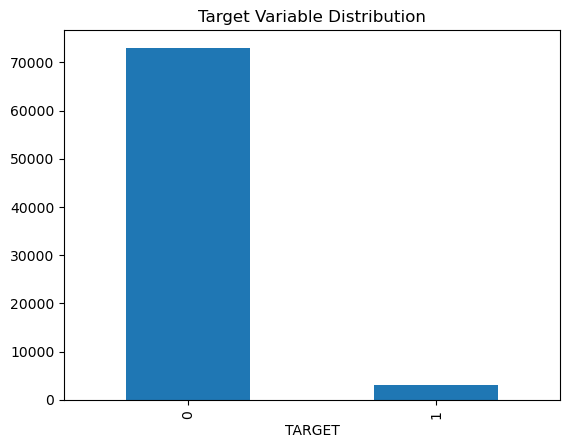

In [4]:
# 1=unsatisfied customer, 0=satisfied customer


# There appears to be a class imbalance, majority of customers are satisfied

import matplotlib.pyplot as plt
df['TARGET'].value_counts().plot(kind='bar')
plt.title("Target Variable Distribution")
plt.show()

In [ ]:
##histogram before data clening/ feature removing

# Note notebook plots are cleared to reduce file size

numerical_features = df.columns
for var in numerical_features:
    print(var)
    plt.figure(figsize=(10,5))
    
    
    plt.hist(df[df['TARGET'] == 0][var], bins=100, histtype="step", color="blue", label="TARGET = 0 (satisfied)", density=1, stacked=True)
    plt.hist(df[df['TARGET'] == 1][var], bins=100, histtype="step", color="red", label="TARGET = 1 (unsatisfied)", density=1, stacked=True)
    
    plt.legend(loc='upper right')
    plt.title(f'Comparison of {var} distribution by TARGET')
    plt.xlabel(var)
    plt.show()

In [ ]:
numerical_features = df.columns

for var in numerical_features:
    plt.figure(figsize=(10, 6))
    plt.scatter(df[df['TARGET'] == 0][var], df[df['TARGET'] == 0]['TARGET'], color='blue', label='TARGET = 0 (satisfied)', alpha=0.5)
    plt.scatter(df[df['TARGET'] == 1][var], df[df['TARGET'] == 1]['TARGET'], color='red', label='TARGET = 1 (unsatisfied)', alpha=0.5)
    
    plt.title(f'Scatter plot of {var} by TARGET')
    plt.xlabel(var)
    plt.ylabel('TARGET')
    plt.legend()
    plt.show()

**Data cleaning**

In [5]:
# remove ID column

df.drop('ID', axis=1,inplace=True)
df.head(5)

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [6]:
df.head(5)

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [16]:
# Remove rows with missing values (-999999)

df=df.replace(-999999,np.nan)
for col in df.columns:
    mode = df[col].mode()
    if not mode.empty:
        df[col].fillna(mode[0], inplace=True)

In [8]:
df.shape

(76020, 370)

In [9]:
## Outlier detection


def remove_outliers_iqr(df, factor=1.5):
    df_clean = df.copy()
    numeric_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns.drop('TARGET', errors='ignore')
    
    for col in numeric_cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - factor * IQR
        upper = Q3 + factor * IQR
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    
    return df_clean

df_cleaned = remove_outliers_iqr(df)


In [64]:
df_cleaned.shape

# This removes too much data, I will standardize the numeric values in train test split
# Ill also use models that can handle outliers (XG Boost, Random Forest)

(18413, 370)

In [10]:
df.shape

(76020, 370)

In [11]:
df.head(5)

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,2.0,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,2.0,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,2.0,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,2.0,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,2.0,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [17]:
## One hot encode Categorical Values

#Several features appear to binary

target_column = 'TARGET'

binary_cols = [col for col in df.columns if df[col].nunique() == 2 and col != target_column]
categorical_cols = [col for col in df.columns if 3 <= df[col].nunique() < 10 and col != target_column]
df= pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df=df.astype(int)

In [18]:
df.shape

(76020, 671)

**Visualizing Graphs after Cleaning**

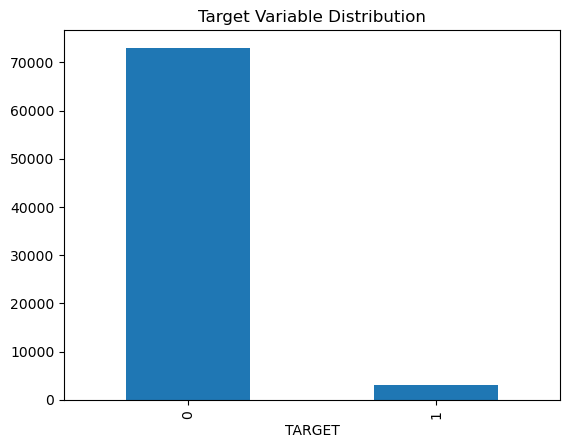

In [19]:
# 1=unsatisfied customer, 0=satisfied customer


# There appears to be a class imbalance, majority of customers are satisfied

import matplotlib.pyplot as plt
df['TARGET'].value_counts().plot(kind='bar')
plt.title("Target Variable Distribution")
plt.show()

In [ ]:
##histogram

numerical_features = df.columns
for var in numerical_features:
    print(var)
    plt.figure(figsize=(10,5))
    
    
    plt.hist(df[df['TARGET'] == 0][var], bins=10, histtype="step", color="blue", label="TARGET = 0 (satisfied)", density=1, stacked=True)
    plt.hist(df[df['TARGET'] == 1][var], bins=10, histtype="step", color="red", label="TARGET = 1 (unsatisfied)", density=1, stacked=True)
    
    plt.legend(loc='upper right')
    plt.title(f'Comparison of {var} distribution by TARGET')
    plt.xlabel(var)
    plt.show()

In [ ]:
numerical_features = df.columns

for var in numerical_features:
    plt.figure(figsize=(10, 6))
    plt.scatter(df[df['TARGET'] == 0][var], df[df['TARGET'] == 0]['TARGET'], color='blue', label='TARGET = 0 (satisfied)', alpha=0.5)
    plt.scatter(df[df['TARGET'] == 1][var], df[df['TARGET'] == 1]['TARGET'], color='red', label='TARGET = 1 (unsatisfied)', alpha=0.5)
    
    plt.title(f'Scatter plot of {var} by TARGET')
    plt.xlabel(var)
    plt.ylabel('TARGET')
    plt.legend()
    plt.show()

**Saving new Dataset**

In [45]:
df.to_csv("Cleaned_df.csv", index=False)

In [49]:
df['TARGET'].value_counts(normalize=True)


TARGET
0    0.960397
1    0.039603
Name: proportion, dtype: float64